In [1]:
import numpy as np

def load_data(file):
    return np.load(file)

def load_samples():
    return load_data('data.npy')

In [2]:
data = load_samples()
print(data.shape)

(2, 4448)


In [3]:
IMAGES = data[0]
LABELS = data[1]
print(IMAGES.shape, IMAGES[0].shape)
print(LABELS.shape, len(LABELS[0]))

(4448,) (48, 64, 3)
(4448,) 5


IMAGES is a numpy array, each element is a picture 
that has _BGR_ (not RGB!) format

Each label consists of 5 numbers:
* `c`: is a number of crosses on the pic (always 1 for good.dat)
* `x1 y1 x2 y2`: are coordinates of top left corner and bottom right corner where the cross is 

## Visualization

In [4]:
import cv2
%pylab inline 
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [59]:
def hist_norm(frame):
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    return img
    #return cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

In [75]:
def hist_grey(frame):
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img

In [92]:
pic_num = 0

In [94]:
def show_image(num):
    frame = IMAGES[num]
    norm = hist_grey(frame)
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    h = hsv[:,:,0]
    s = cv2.equalizeHist(hsv[:,:,1])
    v = cv2.equalizeHist(hsv[:,:,2])
    # Display the frame    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    c,x1,y1,x2,y2 = LABELS[num]
    if c > 0:
         img = cv2.rectangle(img, (x1,y1), (x2,y2), (0, 255, 0))
    
    imshow(np.hstack((img, norm, h,s,v)), cmap='gray')
    show()
    print('\r{:04d}:({} {}) ({} {})'.format(num, x1, y1, x2, y2), end='')
    clear_output(wait=True)

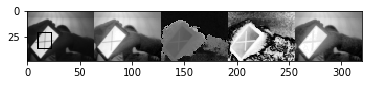

1162:(10 21) (23 36)

In [95]:
print(' ')
for x in range (pic_num, len(IMAGES)):
    try:
        show_image(x)
    except KeyboardInterrupt:
        clear_output(wait=False)
        show_image(x)
        pic_num = x
        break

In [23]:
from ipywidgets import Button

In [24]:
button_fwd = Button(description='fwd')
button_back = Button(description='back')

def onClickfwd(x):
    global pic_num
    if pic_num < len(IMAGES):
        pic_num += 1
    show_image(pic_num)
    
def onClickback(x):
    global pic_num
    if pic_num > 0:
        pic_num -= 1        
    show_image(pic_num)

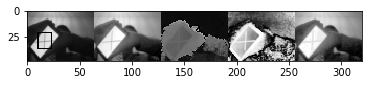

1163:(10 21) (23 36)

In [25]:
button_fwd.on_click(onClickfwd)
button_back.on_click(onClickback)

display(button_back, button_fwd)

In [17]:
from sklearn.utils import shuffle

In [18]:
IMAGES, LABELS = shuffle(IMAGES, LABELS)

In [ ]:
cv2.equalizeHist()